<a href="https://colab.research.google.com/github/MazurovaNN/neural-network/blob/main/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
type(x_train)

numpy.ndarray

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

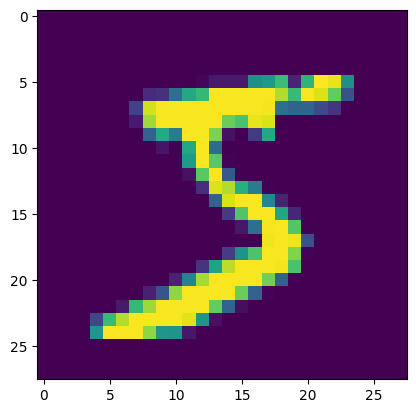

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

In [9]:
y_train[15]

7

In [10]:
input_shape = (28, 28, 1)

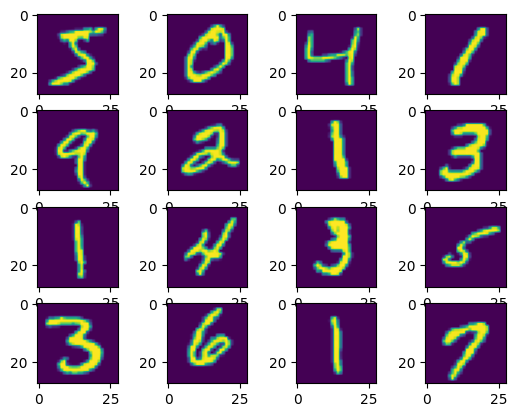

In [11]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [12]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [13]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1277
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1277
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1277
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1277
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1277
CPU times: user 22.5 s, sys: 1.17 s, total: 23.7 s
Wall time: 20.6 s


In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [17]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [18]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3162 - accuracy: 0.9112
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1546 - accuracy: 0.9556
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9658
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0926 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0777 - accuracy: 0.9769
CPU times: user 23.1 s, sys: 1.44 s, total: 24.6 s
Wall time: 20.7 s


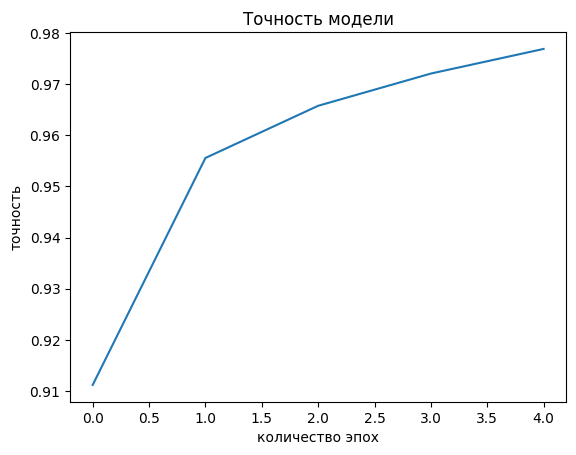

In [20]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

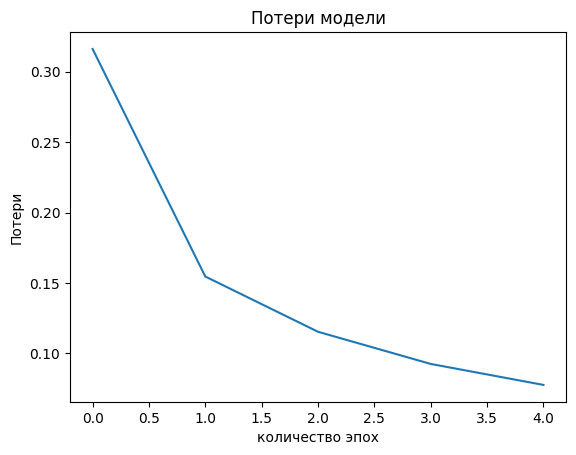

In [21]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [22]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9731


[0.0899088904261589, 0.9731000065803528]

In [23]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.0981 - val_accuracy: 0.9701
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0899 - val_accuracy: 0.9730
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9846 - val_loss: 0.0848 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0880 - val_accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0874 - val_accuracy: 0.9753
CPU times: user 25.3 s, sys: 1.47 s, total: 26.8 s
Wall time: 23.1 s


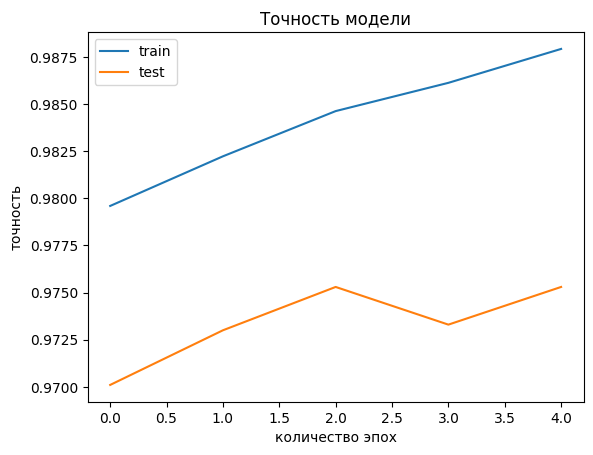

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


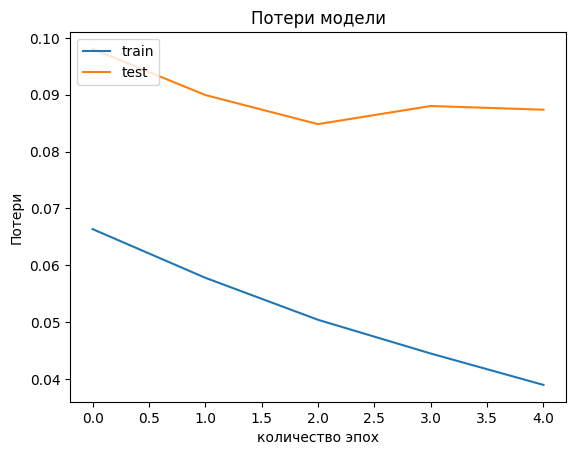

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()